In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
path=r"C:\Users\dell\Data science\Data files\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


**standardization**
- standardization means scaling the data into one scale
- we have different columns has different units so that the value will vary
- one column has very huge values 
- another column has very less values 
- so it is import to scale all type of units under one scale 
- we have 2 procedure 
- standardization
    <img src="https://www.thoughtco.com/thmb/hkBlR9QZwh7yCN9gDgYMSHJbsf8=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/zscore-56a8fa785f9b58b7d0f6e87b.GIF" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="max-width: 330px; height: 242px; margin: 0px; width: 330px;" alt="Practice Problems for Z-Scores" jsname="kn3ccd" aria-hidden="false">
    - the value ranges from 3 to -3
       

**Normalization**
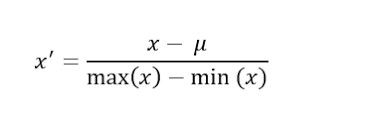
 - values ranges from 0 to 1

In [3]:
# step-1 : take the prevailing wage column
# z-score: x-mean/sigma
# step-2 : caluculate mean of prevailing wage 
#step-3 : caluculate std of prewage
# step-4 : Nr: pwage-mean
# step-5 : pwage_zscore=Nr/Dr

In [16]:
pwage=visa_df['prevailing_wage']
pwage_mean=visa_df['prevailing_wage'].mean()
pwage_std=visa_df['prevailing_wage'].std()
Nr=pwage-pwage_mean
visa_df['prevailing_wage_z']=Nr/pwage_std



In [17]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_z
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504


In [18]:
visa_df[['prevailing_wage','prevailing_wage_z']]

,prevailing_wage,prevailing_wage_z
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


In [19]:
visa_df['prevailing_wage'].max(),visa_df['prevailing_wage_z'].max()
#99.7 % data will between 3 to -3

(319210.27, 4.634101837909902)

In [20]:
visa_df['prevailing_wage'].idxmax()

21077

In [21]:
visa_df['prevailing_wage_z'].idxmax()

21077

In [22]:
visa_df['prevailing_wage'].min(),visa_df['prevailing_wage_z'].min()

(2.1367, -1.4096818992891214)

In [23]:

visa_df['prevailing_wage'].idxmin()

20575

In [25]:
visa_df['prevailing_wage'].idxmin()

20575

In [27]:
cols=['prevailing_wage','prevailing_wage_z']
ids=[21077,20575]
#visa_df[['prevailing_wage'],visa_df['prevailing_wage_z']].iloc[[21077,20575]]
visa_df[cols].iloc[ids]

,prevailing_wage,prevailing_wage_z
21077,319210.2700,4.634102
20575,2.1367,-1.409682


In [ ]:
#generally will overwrite the column values
# 

**standard scaler**
- read the package
- save the package 
- apply fit tranform

In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
visa_df['prevailing_wage_ss']=ss.fit_transform(visa_df[['prevailing_wage']])

In [31]:
cols=['prevailing_wage','prevailing_wage_z','prevailing_wage_ss']
visa_df[cols]

,prevailing_wage,prevailing_wage_z,prevailing_wage_ss
0,592.2029,-1.398510,-1.398537
1,83425.6500,0.169832,0.169835
2,122996.8600,0.919060,0.919079
3,83434.0300,0.169991,0.169994
4,149907.3900,1.428576,1.428604
...,...,...,...
25475,77092.5700,0.049923,0.049924
25476,279174.7900,3.876083,3.876159
25477,146298.8500,1.360253,1.360280
25478,86154.7700,0.221504,0.221509


**Normalization**
   
   $minmaxScaler$

In [32]:
path=r"C:\Users\dell\Data science\Data files\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(path)
visa_df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


In [ ]:
# x-x_min/(x_max-x_min)
# step-1: read the pwage column
#step-2 : find min value of pwage column
# step-3 : find max value of pwage_column
#step-4 : Nr=data column - min value
#step-5 : Dr=max value - min value
#step-6 : Nr/dr

In [33]:
pwage=visa_df['prevailing_wage']
pwage_min=visa_df['prevailing_wage'].min()
pwage_max=visa_df['prevailing_wage'].max()
Nr=pwage-pwage_min
dr=pwage_max-pwage_min
visa_df['prevailing_wage_norm']=Nr/dr

In [34]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_norm
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.269895


In [35]:
visa_df['prevailing_wage_norm'].min(),visa_df['prevailing_wage_norm'].max()

(0.0, 1.0)

**MinMaxScaler**

In [36]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
visa_df['prevailing_wage_mms']=mms.fit_transform(visa_df[['prevailing_wage']])

In [37]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_norm,prevailing_wage_mms
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0.001849,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.261345,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.385312,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.261371,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0.469616,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.241505,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0.874579,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0.458311,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.269895,0.269895


In [39]:
cols=['prevailing_wage_mms']
visa_df[cols]

,prevailing_wage_mms
0,0.001849
1,0.261345
2,0.385312
3,0.261371
4,0.469616
...,...
25475,0.241505
25476,0.874579
25477,0.458311
25478,0.269895
